# Customer Segmentation and Product Recommendation

### Importing of libraries, data and getting information about the data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

plt.style.use('seaborn-v0_8-dark')

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\data-science-projects\Customer_Segmentation\Sample - Superstore.csv",encoding_errors='ignore')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Removing unnecessray columns
data.drop(columns=['Row ID','Ship Date','Postal Code','Customer Name'],inplace=True)

In [6]:
data.head()

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Checking the null values
((data.isnull().sum()/len(data))*100).round(2)

Order ID        0.0
Order Date      0.0
Ship Mode       0.0
Customer ID     0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Region          0.0
Product ID      0.0
Category        0.0
Sub-Category    0.0
Product Name    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

There is no null valued columns

In [8]:
# Checking if there are duplicate values or not
data.duplicated().sum()

np.int64(1)

There is one duplicate value

In [9]:
# Checking the duplicate rows
data[data.duplicated(keep=False)]

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [10]:
# Removing the duplicate column
data=data[~data.duplicated()]

In [11]:
# Checking single valued columns
data.select_dtypes(exclude='number').nunique()

Order ID        5009
Order Date      1237
Ship Mode          4
Customer ID      793
Segment            3
Country            1
City             531
State             49
Region             4
Product ID      1862
Category           3
Sub-Category      17
Product Name    1850
dtype: int64

Country column have only one value and city column have too many values so I will remove thos columns

In [12]:
# Dropping the country column
data.drop(columns=['Country','City',],inplace=True)

In [13]:
# Lower casing columns and renaming
data.columns=data.columns.str.replace("-"," ").str.lower()

In [14]:
data.head()

,order id,order date,ship mode,customer id,segment,state,region,product id,category,sub category,product name,sales,quantity,discount,profit
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Corporate,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
# I will work with sub category column, so removing the category column
data.drop(columns=['category'],inplace=True)

In [16]:
data.head()

,order id,order date,ship mode,customer id,segment,state,region,product id,sub category,product name,sales,quantity,discount,profit
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Corporate,California,West,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,Florida,South,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order id      9993 non-null   object 
 1   order date    9993 non-null   object 
 2   ship mode     9993 non-null   object 
 3   customer id   9993 non-null   object 
 4   segment       9993 non-null   object 
 5   state         9993 non-null   object 
 6   region        9993 non-null   object 
 7   product id    9993 non-null   object 
 8   sub category  9993 non-null   object 
 9   product name  9993 non-null   object 
 10  sales         9993 non-null   float64
 11  quantity      9993 non-null   int64  
 12  discount      9993 non-null   float64
 13  profit        9993 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [18]:
# Changing the data type of order date column
data['order date']=pd.to_datetime(data['order date'],errors='coerce')

In [19]:
# Checking the value counts of each categorical column so there will not be any extra wrong input
for i in data.select_dtypes(exclude='number').columns:
    print(data[i].value_counts(normalize=True)*100)
    print("_"*50)

order id
CA-2017-100111    0.140098
CA-2017-157987    0.120084
CA-2016-165330    0.110077
US-2016-108504    0.110077
CA-2016-105732    0.100070
                    ...   
CA-2014-110422    0.010007
CA-2016-125794    0.010007
CA-2017-163566    0.010007
US-2015-151435    0.010007
CA-2016-130225    0.010007
Name: proportion, Length: 5009, dtype: float64
__________________________________________________
order date
2016-09-05    0.380266
2017-09-02    0.360252
2016-11-10    0.350245
2017-12-01    0.340238
2017-12-02    0.340238
                ...   
2014-11-06    0.010007
2015-12-29    0.010007
2016-06-03    0.010007
2015-04-12    0.010007
2014-01-21    0.010007
Name: proportion, Length: 1237, dtype: float64
__________________________________________________
ship mode
Standard Class    59.711798
Second Class      19.463625
First Class       15.390774
Same Day           5.433804
Name: proportion, dtype: float64
__________________________________________________
customer id
WB-21850    0.37

In [20]:
data.head(1)

,order id,order date,ship mode,customer id,segment,state,region,product id,sub category,product name,sales,quantity,discount,profit
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


### Creating new data frame for customers

In [21]:
# Creating a dataset of customer level
customer=data.groupby('customer id').agg({
    'sales': 'sum',
    'discount': 'mean',
    'quantity': 'sum',
    'order id': 'nunique',
    'product id': 'nunique',
    'sub category': pd.Series.nunique,
    'ship mode':lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'segment':lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

In [22]:
customer.head()

,customer id,sales,discount,quantity,order id,product id,sub category,ship mode,segment
0,AA-10315,5563.560,0.090909,30,5,11,9,Standard Class,Consumer
1,AA-10375,1056.390,0.080000,41,9,15,7,Standard Class,Consumer
2,AA-10480,1790.512,0.016667,36,4,12,7,Standard Class,Consumer
3,AA-10645,5086.935,0.063889,64,6,18,9,Standard Class,Consumer
4,AB-10015,886.156,0.066667,13,3,6,5,First Class,Consumer


### Creating a model for customer segmentation

In [23]:
processor=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,7,8]),
    ('scaling',StandardScaler(),[1,2,3,4,5,6])
],remainder='passthrough')

In [24]:
customer_scaled=processor.fit_transform(customer)

[4131.472513048215, 3604.183231360335, 3285.6063881909377, 3073.2225969840374, 2855.7256709508465, 2732.828724986988, 2643.373843237425, 2565.557835992054]


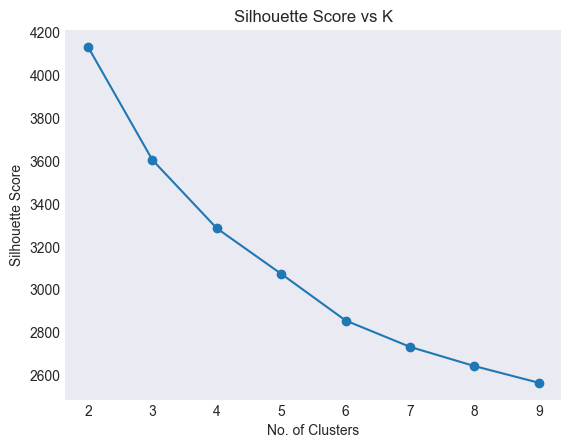

In [25]:

scores = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(customer_scaled)
    scores.append(model.inertia_)
print(scores)

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

We can assume 6 is the best number for k

In [26]:
k = 6  # example
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(customer_scaled)

customer['class'] = clusters

In [27]:
customer.head()

,customer id,sales,discount,quantity,order id,product id,sub category,ship mode,segment,class
0,AA-10315,5563.560,0.090909,30,5,11,9,Standard Class,Consumer,3
1,AA-10375,1056.390,0.080000,41,9,15,7,Standard Class,Consumer,3
2,AA-10480,1790.512,0.016667,36,4,12,7,Standard Class,Consumer,3
3,AA-10645,5086.935,0.063889,64,6,18,9,Standard Class,Consumer,2
4,AB-10015,886.156,0.066667,13,3,6,5,First Class,Consumer,1


In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(customer_scaled)
pca_data = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_data['segment'] = customer['segment'].values

In [29]:
import plotly.express as px

# ----------------------------
# 1. Prepare Your Data
# ----------------------------
# Assume df is your DataFrame and 'segment' is the label column
X = customer.drop(columns=['class'])  # Remove the segment column
y = customer['class']                 # Store the labels separately

# Standardize the data
X_scaled = processor.fit_transform(X)

# ----------------------------
# 2. Apply PCA (3 Components)
# ----------------------------
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Combine PCA results with segment for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['segment'] = y.values

# ----------------------------
# 3. Plot Using Plotly
# ----------------------------
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='segment',
    title='3D PCA Scatter Plot (Interactive)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.7,
    width=900,
    height=600
)

fig.show()

### Merge class to the main dataframe

In [32]:
data=data.merge(customer[['class','customer id']],on='customer id')

In [33]:
data.head()

,order id,order date,ship mode,customer id,segment,state,region,product id,sub category,product name,sales,quantity,discount,profit,class
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,Kentucky,South,FUR-BO-10001798,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,Kentucky,South,FUR-CH-10000454,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1
2,CA-2016-138688,2016-06-12,Second Class,DV-13045,Corporate,California,West,OFF-LA-10000240,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,3
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,Florida,South,FUR-TA-10000577,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2
4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,Florida,South,OFF-ST-10000760,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2


### Creating the knn model

In [46]:
X=data.drop(columns=['product name','product id'],axis=1)
y=data['product name']

In [47]:
X.head(1)

,order id,order date,ship mode,customer id,segment,state,region,sub category,sales,quantity,discount,profit,class
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,Kentucky,South,Bookcases,261.96,2,0.0,41.9136,1


In [51]:
processing=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,2,3,4,5,6,7]),
    ('scaling',StandardScaler(),[8,9,10,11,12])
],remainder='passthrough')

In [59]:
user_input=pd.DataFrame([['CA-2016-152156','2016-11-08','Second Class','CG-12520','Consumer','Kentucky','South','Bookcases',261.96,2,0.0,41.9136,1]],columns=X.columns)

In [71]:
# Fit the model
processed_data = processing.fit_transform(X)
knn = NearestNeighbors(
    n_neighbors=5,
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
knn.fit(processed_data)

# Transform the user input
user_processed = processing.transform(user_input)

# Get nearest neighbors
distances, indices = knn.kneighbors(user_processed)

# ✅ Correct way to get recommended product names
recommended_products = data.iloc[indices[0]]['product name'].values


In [72]:
for i in recommended_products:
    print(i)
    print("-"*20)

Bush Somerset Collection Bookcase
--------------------
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back
--------------------
Clarity 53712
--------------------
Eldon Gobal File Keepers
--------------------
Boston 16750 Black Compact Battery Pencil Sharpener
--------------------
